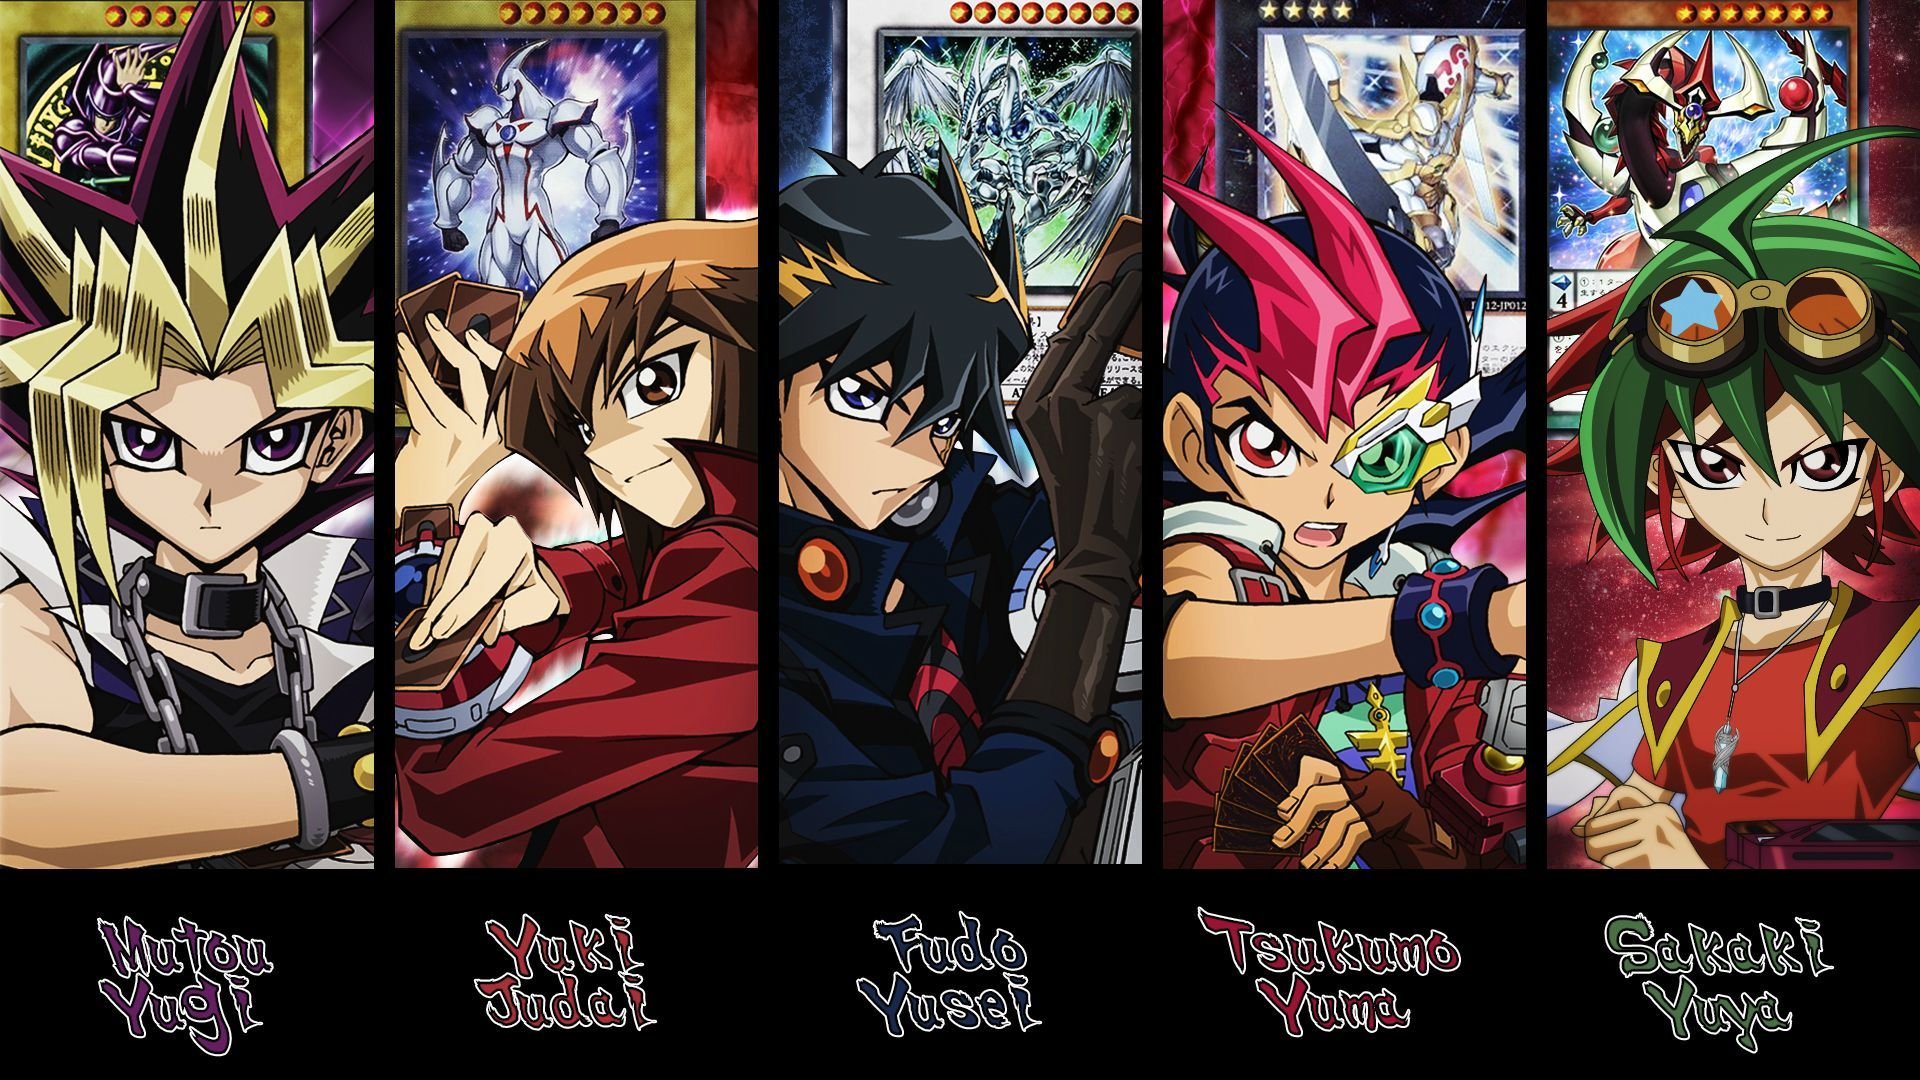

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
Cards = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/card_data.csv')
Cards.head()

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0


# ***Data Exploring***

In [ ]:
Cards.drop_duplicates()

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0
...,...,...,...,...,...,...,...
6518,Cyberdark Claw,Effect Monster,3.0,Dragon,DARK,1600.0,800.0
6519,Cyberdark Inferno,Spell Card,NaN,Field,NaN,NaN,NaN
6520,Lost World,Spell Card,NaN,Field,NaN,NaN,NaN
6521,Performapal Odd-Eyes Minitaurus,Pendulum Effect Monster,4.0,Beast-Warrior,DARK,1200.0,1600.0


In [ ]:
Cards.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6529     True
6530     True
6531     True
6532     True
6533     True
Length: 6534, dtype: bool

In [ ]:
Cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6534 entries, 0 to 6533
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       6534 non-null   object 
 1   Type       6534 non-null   object 
 2   Level      4275 non-null   float64
 3   Race       6534 non-null   object 
 4   Attribute  4275 non-null   object 
 5   ATK        4275 non-null   float64
 6   DEF        4275 non-null   float64
dtypes: float64(3), object(4)
memory usage: 357.5+ KB


In [ ]:
Cards.isnull().sum()

Name            0
Type            0
Level        2259
Race            0
Attribute    2259
ATK          2259
DEF          2259
dtype: int64

In [ ]:
another1 = Cards.loc[Cards['Level'].isnull(),['Race']].value_counts()
another1

Race        
Normal          1126
Continuous       445
Quick-Play       187
Equip            161
Field            120
Counter           89
Ritual            44
Fiend             17
Beast             14
Plant             12
Machine            9
Fairy              5
Warrior            4
Insect             3
Zombie             3
Pyro               3
Winged Beast       3
Aqua               3
Rock               2
Dinosaur           2
Spellcaster        2
Thunder            2
Wyrm               1
Reptile            1
Dragon             1
dtype: int64

In [ ]:
Cards.fillna(value=0, inplace=True)

In [ ]:
Cards.dtypes

Name          object
Type          object
Level        float64
Race          object
Attribute     object
ATK          float64
DEF          float64
dtype: object

# Converting Data and Replacing Values 

In [ ]:
convert_dict = {'ATK': int, 
                'Level': float,
                'DEF': int
               }
Cards = Cards.astype(convert_dict)

In [ ]:
Cards

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,0.0,Continuous,0,0,0
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200,900
2,Gem-Enhancement,Trap Card,0.0,Normal,0,0,0
3,Magician's Circle,Trap Card,0.0,Normal,0,0,0
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920,1930
...,...,...,...,...,...,...,...
6529,Wattcancel,Trap Card,0.0,Counter,0,0,0
6530,Paleozoic Anomalocaris,XYZ Monster,2.0,Aqua,WATER,2400,0
6531,Dark Magician,Normal Monster,7.0,Spellcaster,DARK,2500,2100
6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,7.0,Dragon,DARK,2500,2000


In [ ]:
Cards['Attribute'] = Cards['Attribute'].replace(0, 'Other')

In [ ]:
Cards['Attribute'] = Cards['Attribute'].replace('', 'Other')
Cards

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,0.0,Continuous,Other,0,0
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200,900
2,Gem-Enhancement,Trap Card,0.0,Normal,Other,0,0
3,Magician's Circle,Trap Card,0.0,Normal,Other,0,0
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920,1930
...,...,...,...,...,...,...,...
6529,Wattcancel,Trap Card,0.0,Counter,Other,0,0
6530,Paleozoic Anomalocaris,XYZ Monster,2.0,Aqua,WATER,2400,0
6531,Dark Magician,Normal Monster,7.0,Spellcaster,DARK,2500,2100
6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,7.0,Dragon,DARK,2500,2000


# Basic Graphing

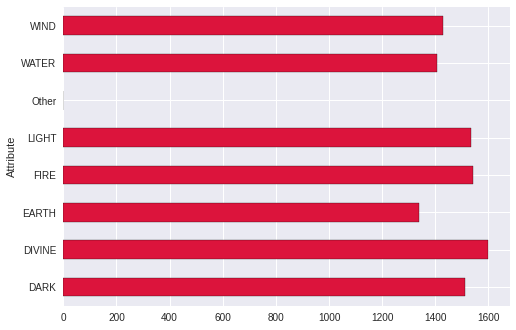

In [ ]:
Cards.groupby('Attribute')['ATK'].mean().plot(kind='barh', color= 'Crimson', edgecolor='black');
#Shows the ATTCK for each Attribute

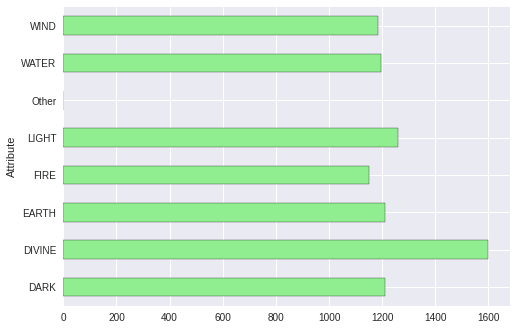

In [ ]:
Cards.groupby('Attribute')['DEF'].mean().plot(kind='barh', color= 'lightgreen', edgecolor='black');
#Shows the DEF for each Attribute

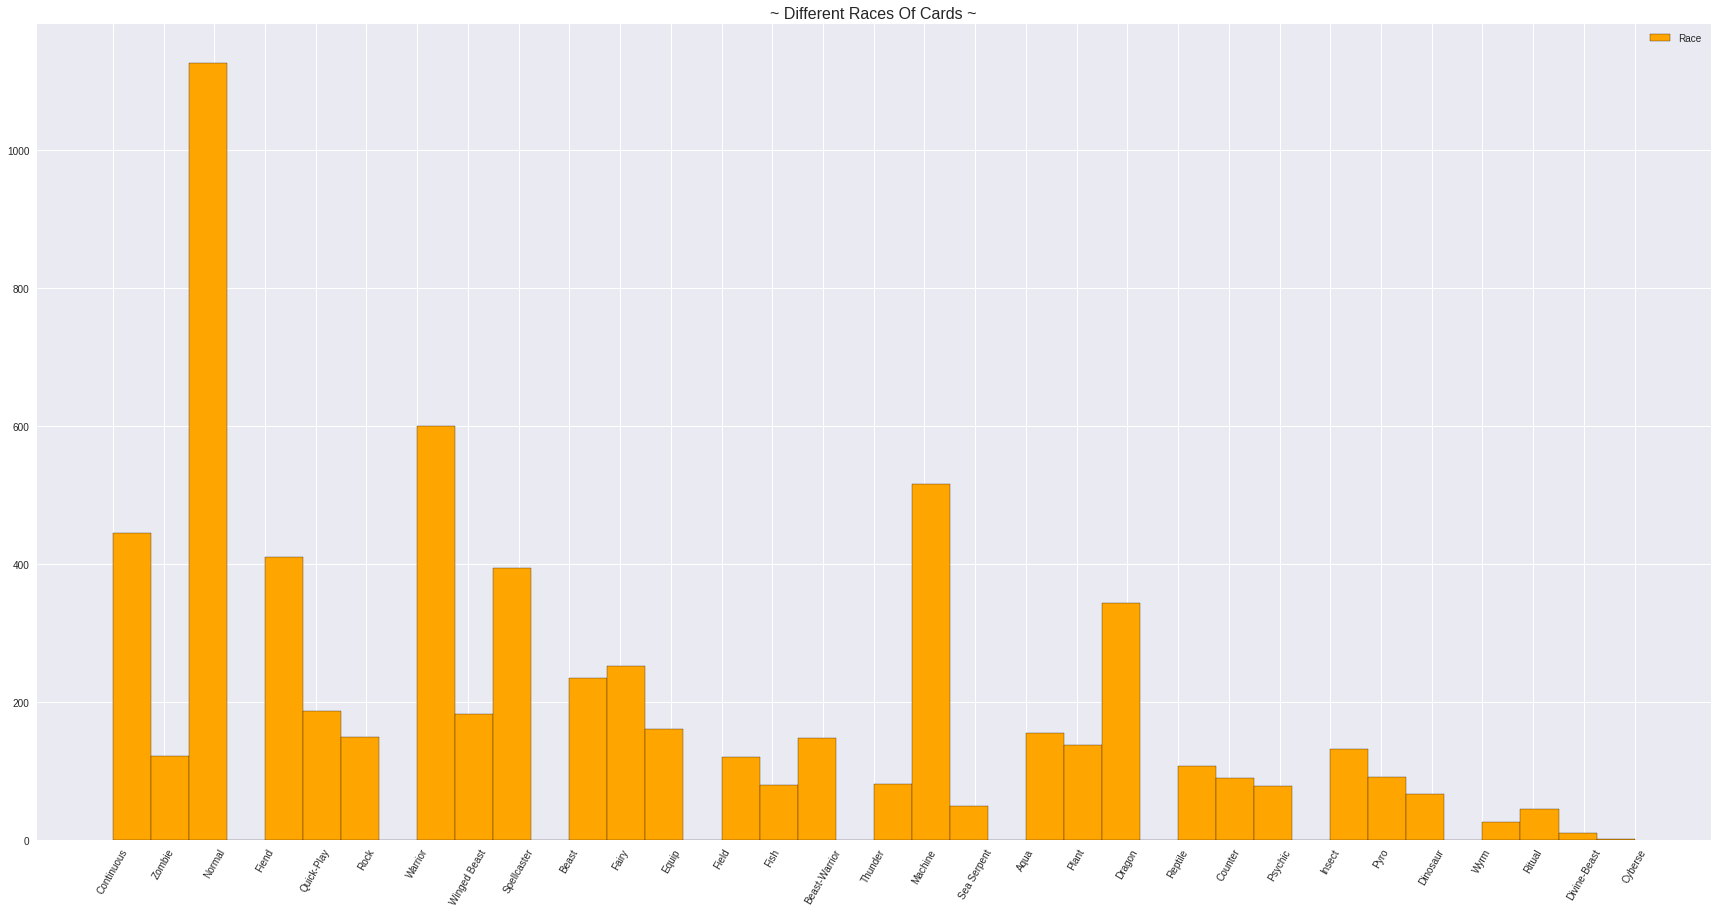

In [ ]:
plt.style.use('seaborn')
Cards['Race'].hist(bins = 40,
  edgecolor='black', label='Race', color='orange', figsize=(30,15));
plt.xticks(rotation = 60);
plt.title('~ Different Races Of Cards ~', fontsize = 16);
plt.legend();

# ML